## Aplicação SageMath

### Criação dos corpos finitos primos

Nesta secção são criadas duas listas:

- A primeira (_P_) corresponde à lista de números primos que serão analisados.
- A segunda (_GP_) corresponde à lista de corpos finitos primos, onde cada elemento corresponde ao corpo finito primo de um dos números primos, previamente adicionados à lista _P_.

In [1]:
P = [37, 163, 263, 1009]
GP = [GF(p) for p in P]

### Definição iniciais

De seguida, definiu-se a função que será aplicada aos pontos dos corpos finitos primos. Esta recebe um ponto _x_ e um primo _p_ e calcula "_x elevado a p menos 2_". Além disso, é definida também uma lista de listas _L_, onde cada uma das mesmas contém os pontos resultantes da aplicação da função aos pontos de um dos corpos finitos primos.

In [2]:
def f(x,p):
    return x^(p-2)

L = [[f(x,p) for x in GF(p)] for p in P]

### Plot da função aplicada a cada um dos corpos finitos

Esta secção tem como objetivo fazer o **plot** dos pontos resultantes da aplicação da função definida anteriormente como `f(x,p)` a cada um dos corpos finitos primos, sendo que o resultado deverá ser apresentado como um gráfico por cada lista de pontos do corpo finito respetivo.

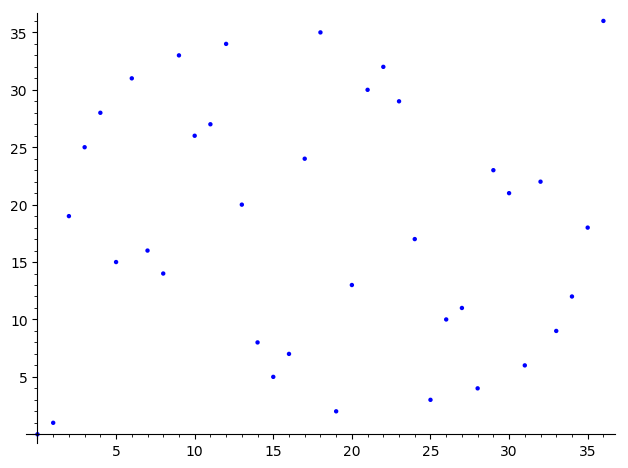

In [3]:
# Plot dos pontos resultantes da aplicação da função aos pontos do corpo finito primo GF(37)
list_plot(L[0])

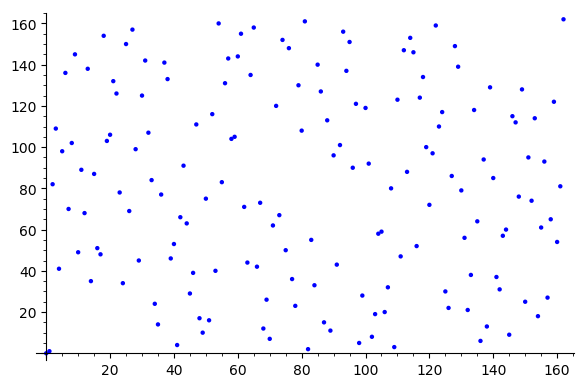

In [4]:
# Plot dos pontos resultantes da aplicação da função aos pontos do corpo finito primo GF(163)
list_plot(L[1])

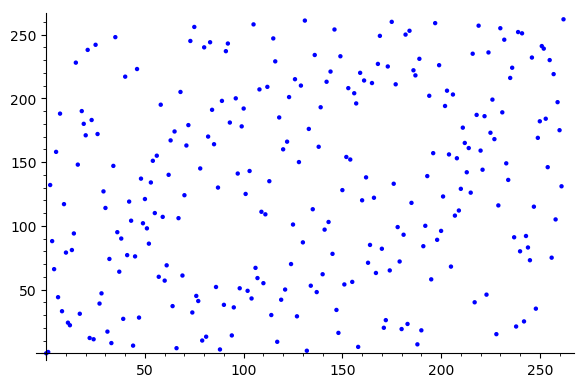

In [5]:
# Plot dos pontos resultantes da aplicação da função aos pontos do corpo finito primo GF(263)
list_plot(L[2])

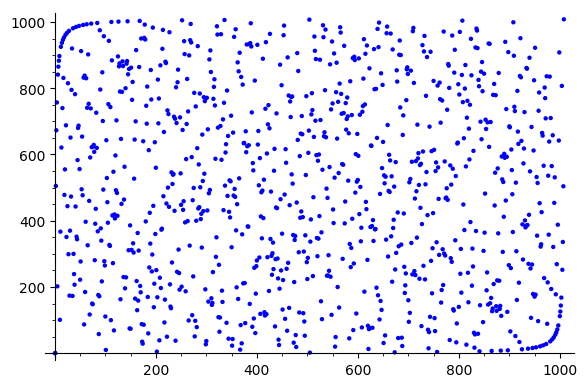

In [6]:
# Plot dos pontos resultantes da aplicação da função aos pontos do corpo finito primo GF(1009)
list_plot(L[3])

A partir da análise dos gráficos previamente gerados podemos verificar que, em todos eles, à primeira vista, parece existir uma certa aleatoriedade nos pontos desenhados mas, analisando melhor cada um deles, podemos confirmar a existência de um padrão simétrico que existe no gráfico.

### Funções da proposição e auxiliares

Resta agora definir duas funções que são utilizadas para garantir a proposição na totalidade. A função `checker(n,g,p)` testa, com o auxílio das funções anteriormente referidas, a veracidade da proposição para um dado expoente, elemento primitivo e número primo, ao tentar encontrar, por amostragem, elementos que provem que a proposição é incorrecta, seguindo o seguinte algoritmo:

- Se $ g ^ n  = 1$:
    - Se $n = 0 mod (p-1)$, a proposição verifica-se, pelo que o resultado retornado é 0 (não existe erro a ser somado).
    - Se $n != 0 mod (p-1)$, a proposição falha, pelo que o resultado retornado é 1 (proposição é falsa para estes elementos, erro deve ser somado).
- Se $ g ^ n  != 1$, a proposição não é testada.

In [7]:
def prop1(g,n): 
    return g^n

def prop2(p): 
    return Mod(0,p-1)

def checker(n,g,p):
    if(prop1(g,n) == 1):
        if(prop2(p) == n):
            return 0
        else: return 1
    else: return 0

### Criação da lista de expoentes aleatórios

Por último criou-se uma lista de expoentes, por amostragem, para que seja averiguada a veracidade da proposição enunciada. São criados 100000 expoentes aleatórios que variam entre 1 e 1 bilião.

In [8]:
import numpy
exponents_list = [numpy.random.randint(1,1000000000000) for i in xrange(100000)]

### Prova da proposição por amostragem

Nesta secção pretendemos, com o auxílio da função `checker(n,g,p)` definida anteriormente, verificar, para todos os corpos finitos primos criados, que a proposição enunciada se verifica, seguindo o seguinte algoritmo:

- Para todo o número primo _p_ em _P_, onde _P_ é a lista dos números primos utilizados para criar os corpos finitos:
    - Para todo o expoente _n_ na lista de expoentes previamente calculada:
        - Calcular o resultado de `checker(n,GF(p).primitive_element(),p)`, onde o segundo argumento é o elemento primitivo do corpo finito do primo _p_.
        - Se a proposição se verificar falsa, a variável _checkFalses_ será incrementada de uma unidade, caso contrário será incrementada de 0 (sem falsos).
    - Imprimir o número primo e o número de falsos encontrados na aplicação da proposição ao mesmo.

In [9]:
checkFalses = 0
for p in P:
    for n in exponents_list:
        checkFalses += checker(n,GF(p).primitive_element(),p)
    print('Primo:')
    print(p)
    print('Nº de erros na proposição:')
    print(checkFalses)
    print('\n')
    checkFalses = 0

Primo:
37
Nº de erros na proposição:
0


Primo:
163
Nº de erros na proposição:
0


Primo:
263
Nº de erros na proposição:
0


Primo:
1009
Nº de erros na proposição:
0




Como é possível verificar pelo output produzido, a proposição enunciada verifica-se para todos os expoentes gerados por amostragem e para todos os corpos finitos primos criados.

## Conclusão

Os resultados da resolução deste trabalho prático são, na nossa opinião, bastante satisfatórios, tendo em conta que os mesmos são os que eram esperados. O desenvolvimento das aplicações foi feito de um modo gradual (texto de explicação pelo entre o código), de forma a tornar a leitura e compreensão do trabalho mais agradável.

As maiores dificuldades que surgiram durante a resolução deste trabalho prático resumiram-se, na sua maior parte, aos aspetos que dizem respeito ao desenvolvimento utilizando **sagemath**, visto que este foi o primeiro contacto do grupo com esta tecnologia. Além disso, este é também o primeiro relatório que o grupo produz neste formato, ou seja, utilizando apenas o **jupyter** para a produção do código e do próprio texto do mesmo, pelo que tentámos familiarizar-nos apenas com a ferramenta, especificamente, na produção do ficheiro necessário, que representa o relatório na sua totalidade.

## Referências

1. [Worksheets do TP0 fornecidas pelo professor](https://www.dropbox.com/sh/f0j9adiaw4v3deb/AACBpI2YqgkN5iuVEas5P8wVa/WorkSheets/TP0?dl=0&subfolder_nav_tracking=1)
2. [Cryptography - Symmetric encryption](https://cryptography.io/en/latest/hazmat/primitives/symmetric-encryption/)
3. [Cryptography - Message Authentication Codes](https://cryptography.io/en/latest/hazmat/primitives/mac/)
4. [Cryptography - Key Derivation Functions](https://cryptography.io/en/latest/hazmat/primitives/key-derivation-functions/)
5. [SageMath - Finite Prime Fields](http://doc.sagemath.org/html/en/reference/finite_rings/sage/rings/finite_rings/finite_field_prime_modn.html)
6. [SageMath - 2D Plotting](http://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html)
7. [SageMath - Base Classes for Finite Fields](http://doc.sagemath.org/html/en/reference/finite_rings/sage/rings/finite_rings/finite_field_base.html)